<font size="6">**1. Import Required Libraries**</font> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy import sqrt
import warnings
warnings.simplefilter(action="ignore")



<font size="6">**2. Loading the Data Set**</font> 

In [2]:
train = pd.read_csv('/Users/mgpel/OneDrive/Autumn_Falls/train.csv')
test = pd.read_csv('/Users/mgpel/OneDrive/Autumn_Falls/test.csv')

<font size="6">**3. Checking the Data Set Columns**</font> 

In [3]:
train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,Foundation_PConc,KitchenQual_TA
0,6,1969,1969,663,663,1352,1,7,1,299,158000,1,0,1
1,6,1920,1950,1012,1012,1012,1,6,1,308,118400,1,0,1
2,5,1910,2006,1022,1022,1022,1,4,1,280,85000,1,0,1
3,5,1973,1973,1656,1656,1656,2,8,2,506,135000,1,0,1
4,6,1978,1978,918,918,1683,2,7,2,440,172500,1,0,1


In [4]:
test.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,Foundation_PConc,KitchenQual_TA
0,4,1961,1961,1029,1029,1029,1,5,1,261,118500,1,0,1
1,5,1921,1950,731,820,1343,1,7,1,186,154900,1,0,1
2,7,1998,1998,723,767,767,1,4,1,367,133000,1,1,1
3,4,1955,1955,1005,1005,1005,1,5,2,672,115000,1,0,0
4,6,1963,2003,1059,1068,1068,1,6,1,264,154500,1,0,1


In [5]:
train.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'ExterQual_TA', 'Foundation_PConc', 'KitchenQual_TA'],
      dtype='object')

<font size="6">**4. Creating a Model Object**</font> 

In [6]:
model = LinearRegression()

<font size="6">**5. Creating the Independent Variables**</font>

In [7]:
X_train = train.drop('SalePrice', axis=1)

<font size="6">**6. Creating the Target Variable**</font> 

In [8]:
y_train = train.loc[:,'SalePrice']

<font size="6">**7. Model Training**</font> 

In [9]:
model.fit(X_train,y_train)

LinearRegression()

<font size="6">**8. Extraction of Independent Variables for Testing**</font> 

In [10]:
X_test = test.drop('SalePrice', axis=1)

<font size="6">**9. Extraction of Target Variable for Testing**</font> 

In [11]:
y_test = test.loc[:,'SalePrice']

<font size="6">**10. Prediction Using Trained Model**</font>

In [12]:
predictions = model.predict(X_test)

<font size="6">**11. RMSE Calculation for Model Predictions**</font> 

In [13]:
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error:  ${rmse:.0f}')

Root Mean Squared Error:  $33186


<font size="6">**12. Comparison of Actual Values and Predictions**</font> 

In [14]:
comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": predictions})


In [15]:
comparison.head()

,Actual Values,Predictions
0,118500,83380.944694
1,154900,105974.149765
2,133000,139238.138343
3,115000,104982.049557
4,154500,140473.360146


In [16]:
comparison.tail()

,Actual Values,Predictions
324,132250,102816.796295
325,123000,121698.649065
326,316600,271745.844407
327,142000,131258.275591
328,250000,263005.372419


<font size="6">**13. Top 10 Features with Highest Correlation to SalePrice**</font> 

In [21]:
top_corr = train.corr()["SalePrice"].sort_values(ascending=False).head(11)
top_corr

SalePrice           1.000000
OverallQual         0.792263
GrLivArea           0.712054
GarageCars          0.658355
GarageArea          0.621354
1stFlrSF            0.621057
TotalBsmtSF         0.612205
FullBath            0.597505
TotRmsAbvGrd        0.573845
Foundation_PConc    0.517222
YearRemodAdd        0.504414
Name: SalePrice, dtype: float64

<font size="6">**14. Correlation Heat Map of Variables in the Training Dataset**</font> 

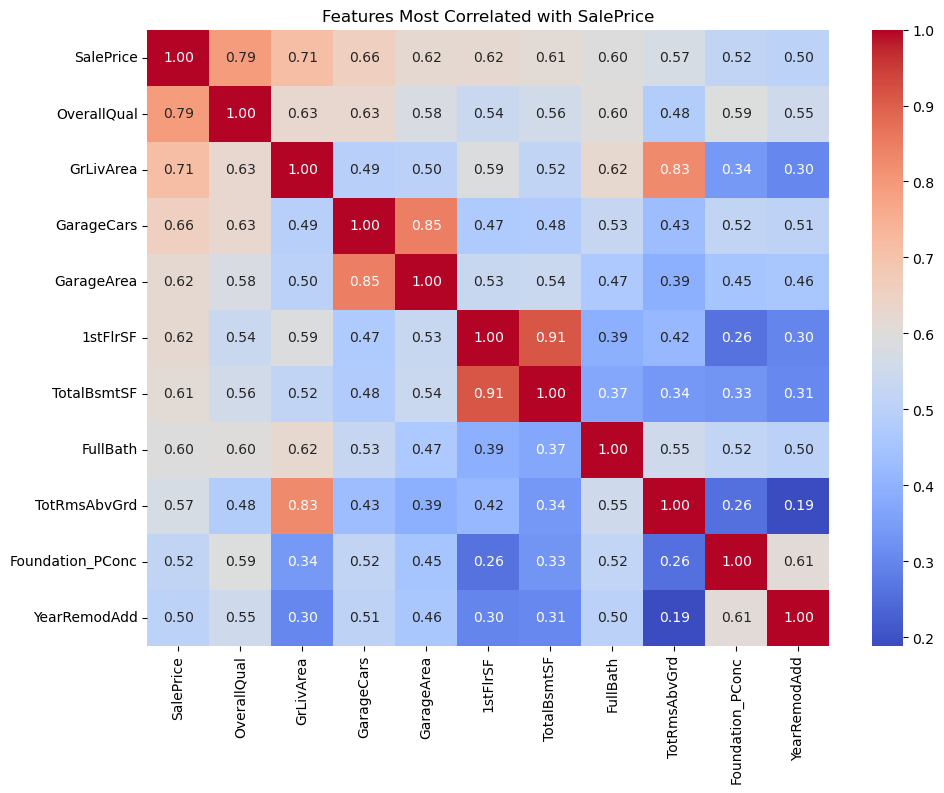

In [22]:
import seaborn as sns
top_corr = train[top_corr.index]
plt.figure(figsize=(11,8))
sns.heatmap(top_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Features Most Correlated with SalePrice")
plt.show()

In [25]:
#Correlation Matrix of Variables in the Training Dataset
correlations = train.corr()
correlations

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,Foundation_PConc,KitchenQual_TA
OverallQual,1.000000,0.572367,0.550407,0.557685,0.539527,0.628890,0.598265,0.482744,0.627897,0.579378,0.792263,-0.692146,0.593079,-0.579892
YearBuilt,0.572367,1.000000,0.615451,0.418706,0.315715,0.205311,0.496001,0.122193,0.530869,0.466243,0.503317,-0.608600,0.675289,-0.478635
YearRemodAdd,0.550407,0.615451,1.000000,0.305751,0.299912,0.300983,0.500358,0.189233,0.507051,0.459938,0.504414,-0.586210,0.608433,-0.621112
TotalBsmtSF,0.557685,0.418706,0.305751,1.000000,0.912271,0.517430,0.370448,0.337671,0.476327,0.539858,0.612205,-0.414837,0.330111,-0.353424
1stFlrSF,0.539527,0.315715,0.299912,0.912271,1.000000,0.589766,0.392271,0.416777,0.472616,0.531808,0.621057,-0.355415,0.262008,-0.315156
GrLivArea,0.628890,0.205311,0.300983,0.517430,0.589766,1.000000,0.624707,0.826999,0.492914,0.499800,0.712054,-0.427637,0.340340,-0.384288
FullBath,0.598265,0.496001,0.500358,0.370448,0.392271,0.624707,1.000000,0.550967,0.528268,0.465081,0.597505,-0.516471,0.519781,-0.474227
TotRmsAbvGrd,0.482744,0.122193,0.189233,0.337671,0.416777,0.826999,0.550967,1.000000,0.426842,0.389448,0.573845,-0.307535,0.255900,-0.251362
GarageCars,0.627897,0.530869,0.507051,0.476327,0.472616,0.492914,0.528268,0.426842,1.000000,0.845512,0.658355,-0.543945,0.517289,-0.465095
GarageArea,0.579378,0.466243,0.459938,0.539858,0.531808,0.499800,0.465081,0.389448,0.845512,1.000000,0.621354,-0.511492,0.451725,-0.455758


<font size="6">**15. Correlation of SalePrice with Other Variables**</font> 


In [24]:
saleprice_correlations = correlations["SalePrice"]
saleprice_correlations

OverallQual         0.792263
YearBuilt           0.503317
YearRemodAdd        0.504414
TotalBsmtSF         0.612205
1stFlrSF            0.621057
GrLivArea           0.712054
FullBath            0.597505
TotRmsAbvGrd        0.573845
GarageCars          0.658355
GarageArea          0.621354
SalePrice           1.000000
ExterQual_TA       -0.598202
Foundation_PConc    0.517222
KitchenQual_TA     -0.527176
Name: SalePrice, dtype: float64

<font size="6">**16. Top 10 Correlations with SalePrice**</font> 


In [26]:

saleprice_correlations.sort_values(ascending=False).head(10)

SalePrice           1.000000
OverallQual         0.792263
GrLivArea           0.712054
GarageCars          0.658355
GarageArea          0.621354
1stFlrSF            0.621057
TotalBsmtSF         0.612205
FullBath            0.597505
TotRmsAbvGrd        0.573845
Foundation_PConc    0.517222
Name: SalePrice, dtype: float64